In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import os
import glob
import random

%matplotlib inline

In [14]:
# Navigate to My Drive directory to store the dataset
%cd Brain_MRI


[WinError 2] The system cannot find the file specified: 'Brain_MRI'
E:\Users\LENOVO\Desktop\wde\Healthcare\Brain_MRI


In [15]:
brain_df = pd.read_csv('data_mask.csv')

In [16]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  3929 non-null   object
 1   image_path  3929 non-null   object
 2   mask_path   3929 non-null   object
 3   mask        3929 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 122.9+ KB


In [17]:
brain_df.tail(50)

patient_id  \
3879  TCGA_DU_6401_19831001   
3880  TCGA_DU_6401_19831001   
3881  TCGA_DU_6401_19831001   
3882  TCGA_DU_6401_19831001   
3883  TCGA_DU_6401_19831001   
3884  TCGA_DU_6401_19831001   
3885  TCGA_DU_6401_19831001   
3886  TCGA_DU_6401_19831001   
3887  TCGA_DU_6401_19831001   
3888  TCGA_DU_6401_19831001   
3889  TCGA_DU_6401_19831001   
3890  TCGA_DU_6401_19831001   
3891  TCGA_DU_6401_19831001   
3892  TCGA_DU_6401_19831001   
3893  TCGA_DU_6401_19831001   
3894  TCGA_DU_6401_19831001   
3895  TCGA_DU_6401_19831001   
3896  TCGA_DU_6401_19831001   
3897  TCGA_DU_6401_19831001   
3898  TCGA_DU_6401_19831001   
3899  TCGA_DU_6401_19831001   
3900  TCGA_DU_6401_19831001   
3901  TCGA_DU_6401_19831001   
3902  TCGA_DU_6401_19831001   
3903  TCGA_DU_6401_19831001   
3904  TCGA_DU_6401_19831001   
3905  TCGA_DU_6401_19831001   
3906  TCGA_DU_6401_19831001   
3907  TCGA_DU_6401_19831001   
3908  TCGA_DU_6401_19831001   
3909  TCGA_DU_6401_19831001   
3910  TCGA_DU_6401_19831001   
3911  TCGA_DU_6401_19831001   
3912  TCGA_DU_6401_19831001   
3913  TCGA_DU_6401_19831001   
3914  TCGA_DU_6401_19831001   
3915  TCGA_DU_6401_19831001   
3916  TCGA_DU_6401_19831001   
3917  TCGA_DU_6401_19831001   
3918  TCGA_DU_6401_19831001   
3919  TCGA_DU_6401_19831001   
3920  TCGA_DU_6401_19831001   
3921  TCGA_DU_6401_19831001   
3922  TCGA_DU_6401_19831001   
3923  TCGA_DU_6401_19831001   
3924  TCGA_DU_6401_19831001   
3925  TCGA_DU_6401_19831001   
3926  TCGA_DU_6401_19831001   
3927  TCGA_DU_6401_19831001   
3928  TCGA_DU_6401_19831001   

                                             image_path  \
3879  TCGA_DU_5872_19950223/TCGA_DU_5872_19950223_71...   
3880  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_71...   
3881  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_71...   
3882  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_71...   
3883  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_71...   
3884  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_72...   
3885  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_72...   
3886  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_72...   
3887  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_72...   
3888  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_73...   
3889  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_73...   
3890  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_73...   
3891  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_73...   
3892  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_74...   
3893  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_74...   
3894  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_74...   
3895  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_75...   
3896  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_75...   
3897  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_75...   
3898  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_76...   
3899  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_76...   
3900  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_76...   
3901  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_77...   
3902  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_77...   
3903  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_77...   
3904  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_78...   
3905  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_78...   
3906  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_78...   
3907  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_79...   
3908  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_79...   
3909  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_79...   
3910  TCGA_HT_7881_19981015/TCGA_HT_7881_19981015_80...   
3911  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_80...   
3912  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_80...   
3913  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_81...   
3914  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_81...   
3915  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_82...   
3916  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_82...   
3917  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_83...   
3918  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_83...   
3919  TCGA_HT_A6

In [18]:
brain_df.mask_path[1] # Path to the brain MRI image

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_mask.tif'

In [19]:
brain_df.image_path[1] # Path to the segmentation mask

'TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif'

MINI CHALLENGE #1:
  - Do we have a balanced dataset? 
  - How many samples are classified as 'healthy'?

# TASK #3: PERFORM DATA VISUALIZATION

In [20]:
brain_df

patient_id  \
0     TCGA_CS_5395_19981004   
1     TCGA_CS_5395_19981004   
2     TCGA_CS_5395_19981004   
3     TCGA_CS_5395_19981004   
4     TCGA_CS_5395_19981004   
...                     ...   
3924  TCGA_DU_6401_19831001   
3925  TCGA_DU_6401_19831001   
3926  TCGA_DU_6401_19831001   
3927  TCGA_DU_6401_19831001   
3928  TCGA_DU_6401_19831001   

                                             image_path  \
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif   
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif   
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif   
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif   
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif   
...                                                 ...   
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...   
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...   
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...   
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...   
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...   

                                              mask_path  mask  
0     TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...     0  
1     TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...     0  
2     TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...     0  
3     TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...     0  
4     TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...     0  
...                                                 ...   ...  
3924  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...     0  
3925  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...     0  
3926  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...     0  
3927  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...     0  
3928  TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...     0  

[3929 rows x 4 columns]

In [21]:
brain_df['mask'].value_counts().index

Int64Index([0, 1], dtype='int64')

In [22]:
# Use plotly to plot interactive bar chart
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x = brain_df['mask'].value_counts().index, y = brain_df['mask'].value_counts())])
fig.update_traces(marker_color = 'rgb(0,200,0)', marker_line_color = 'rgb(0,255,0)',
                  marker_line_width = 7, opacity = 0.6)
fig.show()

In [23]:
brain_df.mask_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1_...
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1_...
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1_...
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1_...
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1_...
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: mask_path, Length: 3929, dtype: object

In [24]:
brain_df.image_path

0       TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_1.tif
1       TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_1.tif
2       TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif
3       TCGA_CS_4943_20000902/TCGA_CS_4943_20000902_1.tif
4       TCGA_CS_5396_20010302/TCGA_CS_5396_20010302_1.tif
                              ...                        
3924    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_86...
3925    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_87...
3926    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_87...
3927    TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_88...
3928    TCGA_HT_A61B_19991127/TCGA_HT_A61B_19991127_88...
Name: image_path, Length: 3929, dtype: object

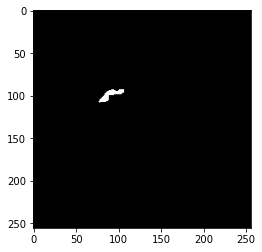

In [25]:
plt.imshow(cv2.imread(brain_df.mask_path[623]))

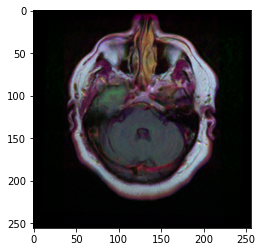

In [26]:
plt.imshow(cv2.imread(brain_df.image_path[623]))

In [27]:
cv2.imread(brain_df.mask_path[623]).max()

255

In [28]:
cv2.imread(brain_df.mask_path[623]).min()

0

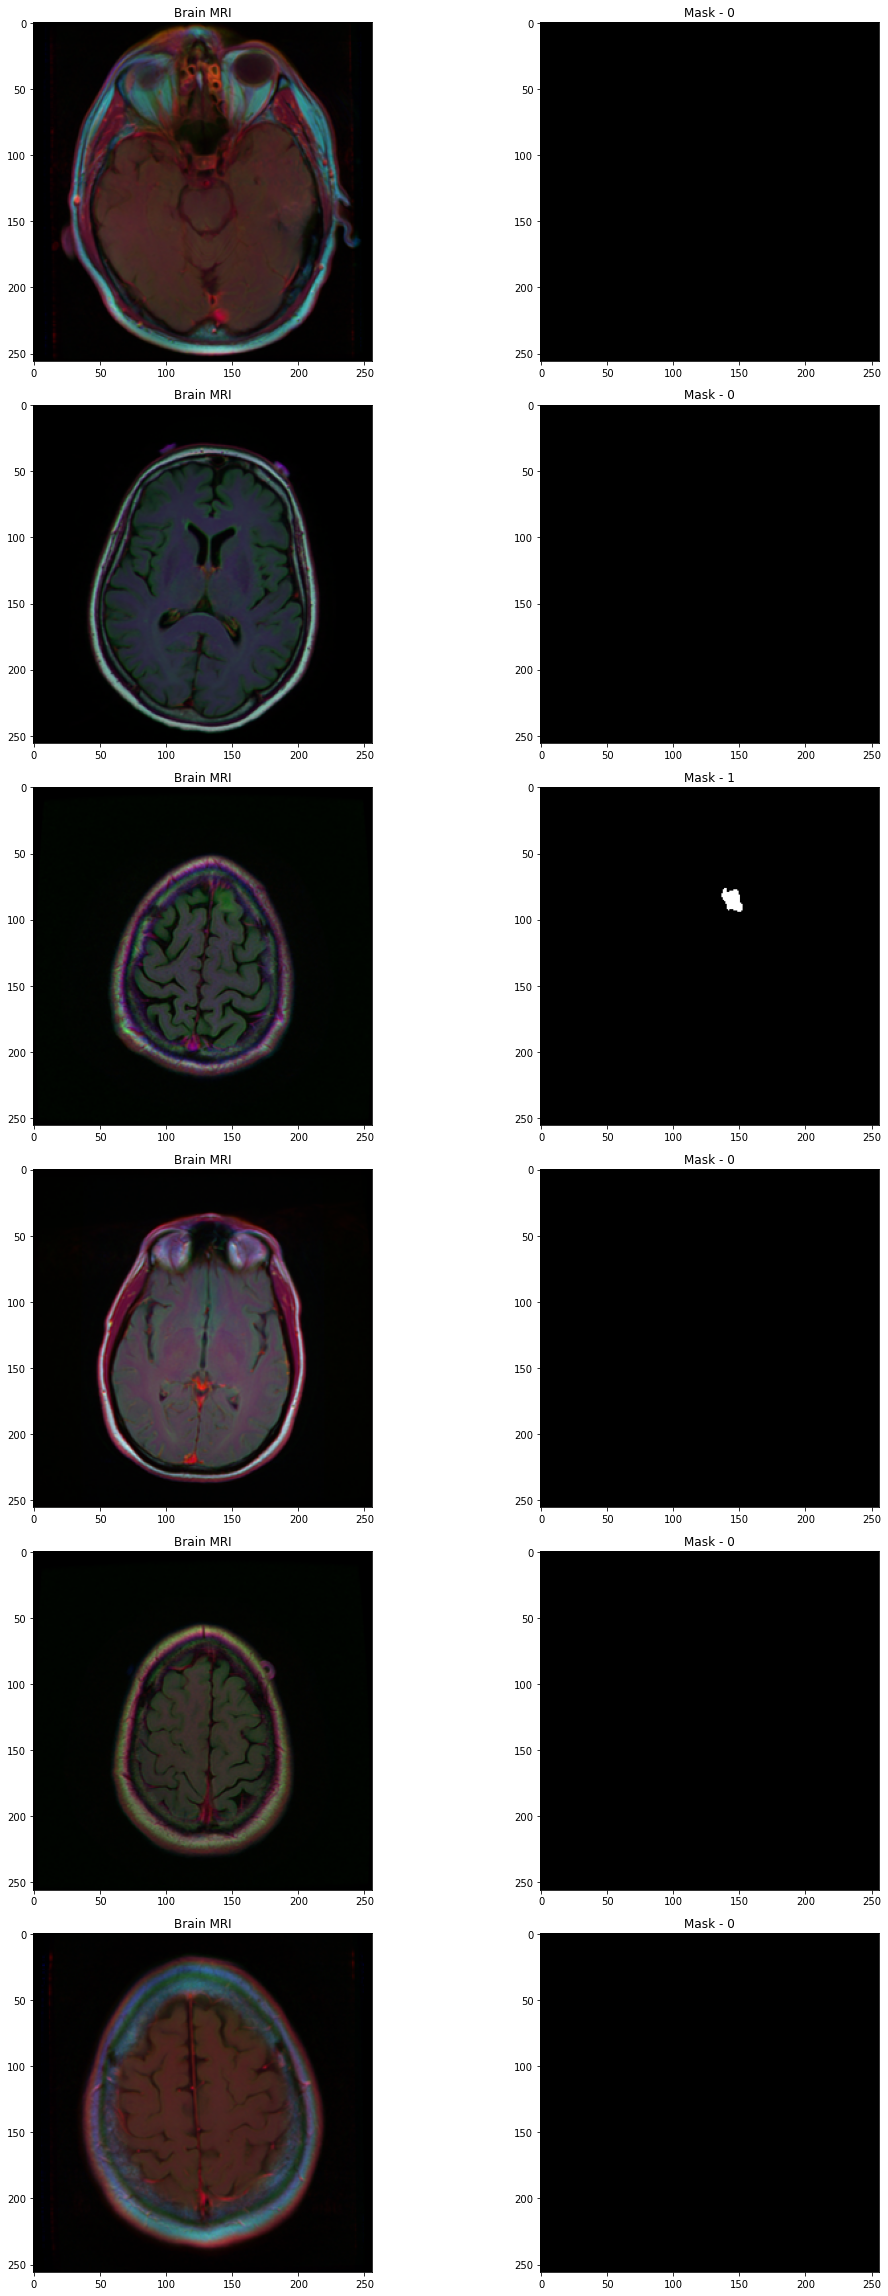

In [29]:
# Basic visualizations: Visualize the images (MRI and Mask) in the dataset separately 
import random
fig, axs = plt.subplots(6,2, figsize=(16,32))
count = 0
for x in range(6):
  i = random.randint(0, len(brain_df)) # select a random index
  axs[count][0].title.set_text("Brain MRI") # set title
  axs[count][0].imshow(cv2.imread(brain_df.image_path[i])) # show MRI 
  axs[count][1].title.set_text("Mask - " + str(brain_df['mask'][i])) # plot title on the mask (0 or 1)
  axs[count][1].imshow(cv2.imread(brain_df.mask_path[i])) # Show corresponding mask
  count += 1

fig.tight_layout()

MINI CHALLENGE #2: 
 - Plot 12 randomly selected (1) MRI scan images from only sick patients followed by (2) corresponding mask, (3) both MRI image and the corresponding mask (in red color) on top of each other

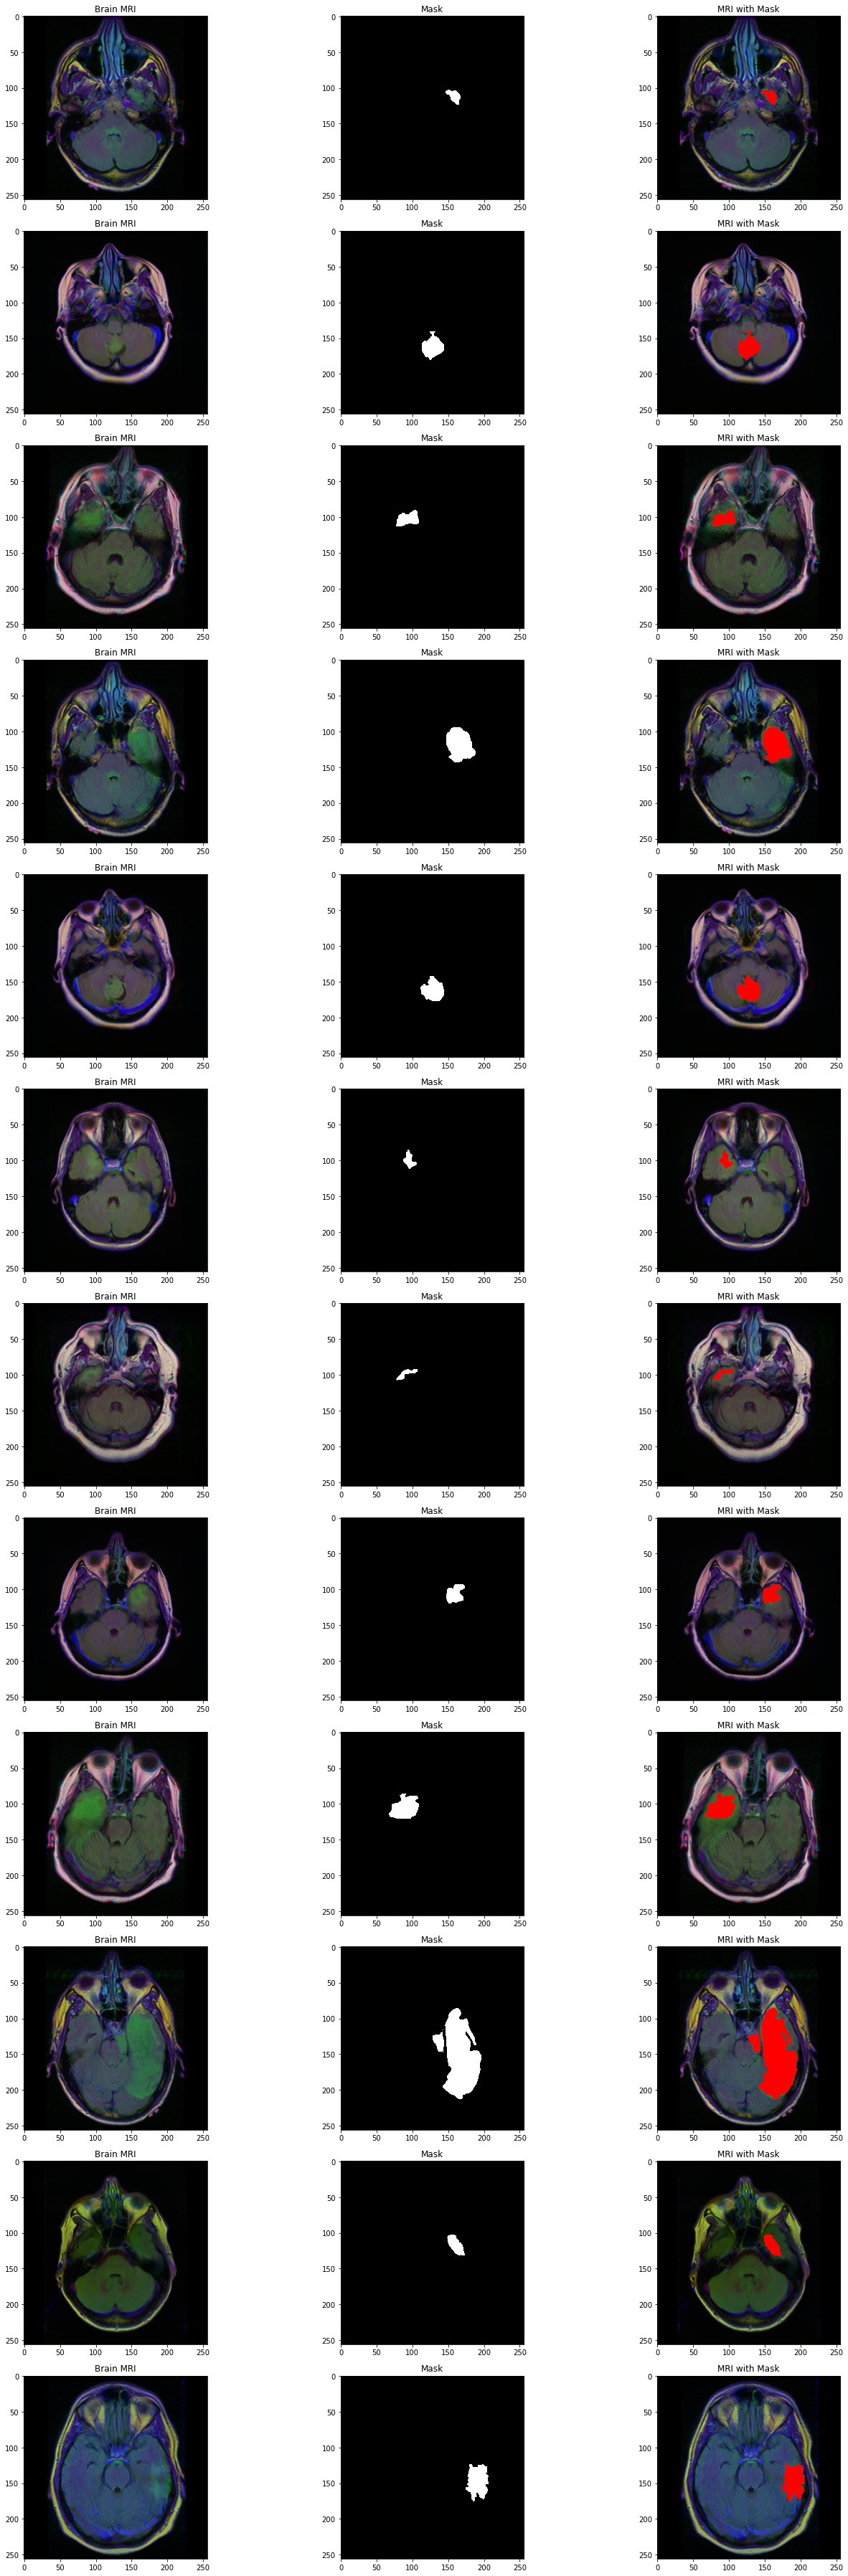

In [30]:
count = 0
fig, axs = plt.subplots(12, 3, figsize = (20, 50))
for i in range(len(brain_df)):
  if brain_df['mask'][i] ==1 and count <12:
    img = io.imread(brain_df.image_path[i])
    axs[count][0].title.set_text('Brain MRI')
    axs[count][0].imshow(img)

    mask = io.imread(brain_df.mask_path[i])
    axs[count][1].title.set_text('Mask')
    axs[count][1].imshow(mask, cmap = 'gray')

    
    img[mask == 255] = (255, 0, 0)
    axs[count][2].title.set_text('MRI with Mask')
    axs[count][2].imshow(img)
    count+=1

fig.tight_layout()


# TASK #6: TRAIN A CLASSIFIER MODEL TO DETECT IF TUMOR EXISTS OR NOT

In [31]:
# Drop the patient id column
brain_df_train = brain_df.drop(columns = ['patient_id'])
brain_df_train.shape

(3929, 3)

In [32]:
# Convert the data in mask column to string format, to use categorical mode in flow_from_dataframe
# You will get this error message if you comment out the following code line:
# TypeError: If class_mode="categorical", y_col="mask" column values must be type string, list or tuple.
brain_df_train['mask'] = brain_df_train['mask'].apply(lambda x: str(x))

In [33]:
brain_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  3929 non-null   object
 1   mask_path   3929 non-null   object
 2   mask        3929 non-null   object
dtypes: object(3)
memory usage: 92.2+ KB


In [34]:
# split the data into train and test data

from sklearn.model_selection import train_test_split

train, test = train_test_split(brain_df_train, test_size = 0.15)

In [35]:
# create a image generator
from keras_preprocessing.image import ImageDataGenerator

# Create a data generator which scales the data from 0 to 1 and makes validation split of 0.15
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.15)


In [36]:
train_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="training",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))


valid_generator=datagen.flow_from_dataframe(
dataframe=train,
directory= './',
x_col='image_path',
y_col='mask',
subset="validation",
batch_size=16,
shuffle=True,
class_mode="categorical",
target_size=(256,256))

# Create a data generator for test images
test_datagen=ImageDataGenerator(rescale=1./255.)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test,
directory= './',
x_col='image_path',
y_col='mask',
batch_size=16,
shuffle=False,
class_mode='categorical',
target_size=(256,256))



Found 2839 validated image filenames belonging to 2 classes.
Found 500 validated image filenames belonging to 2 classes.
Found 590 validated image filenames belonging to 2 classes.


In [37]:
# Get the ResNet50 base model
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(256, 256, 3)))

94773248/94765736 [==============================] - 31s 0us/step


In [38]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [39]:
# freeze the model weights

for layer in basemodel.layers:
  layers.trainable = False

In [40]:
# Add classification head to the base model

headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)#
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
#headmodel = Dense(256, activation = "relu")(headmodel)
#headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(2, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [42]:
# compile the model

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [43]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with least validation loss
checkpointer = ModelCheckpoint(filepath="classifier-resnet-weights.hdf5", verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator, steps_per_epoch= train_generator.n // 16, epochs = 5, validation_data= valid_generator, validation_steps= valid_generator.n // 16, callbacks=[checkpointer, earlystopping])

In [47]:
# save the model architecture to json file for future use

model_json = model.to_json()
with open("classifier-resnet-model.json","w") as json_file:
  json_file.write(model_json)

# TASK #7: ASSESS TRAINED MODEL PERFORMANCE

In [45]:
# Load pretrained model (instead of training the model for 1+ hours) 
with open('resnet-50-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()
# load the model  
model = tf.keras.models.model_from_json(json_savedModel)
model.load_weights('weights.hdf5')
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics= ["accuracy"])

In [46]:
# make prediction

test_predict = model.predict(test_generator, steps = test_generator.n // 16, verbose =1)

36/36 [==============================] - 79s 2s/step


In [47]:
test_predict.shape

(576, 2)

In [48]:
test_generator

In [49]:
test_predict

array([[9.9970323e-01, 2.9674030e-04],
       [9.9999917e-01, 8.1623921e-07],
       [9.9958378e-01, 4.1618073e-04],
       ...,
       [9.9859899e-01, 1.4009543e-03],
       [9.9978667e-01, 2.1339215e-04],
       [2.9890335e-18, 1.0000000e+00]], dtype=float32)

In [50]:
# Obtain the predicted class from the model prediction
predict = []

for i in test_predict:
  predict.append(str(np.argmax(i)))

predict = np.asarray(predict)

In [51]:
predict

array(['0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1',
       '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0',
       '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0',
       '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1',
       '1', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '0',
       '1', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '0',
       '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0',
       '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1

In [52]:
# since we have used test generator, it limited the images to len(predict), due to batch size
original = np.asarray(test['mask'])[:len(predict)]
len(original)

576

In [53]:
# Obtain the accuracy of the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, predict)
accuracy

0.9878472222222222

<AxesSubplot:>

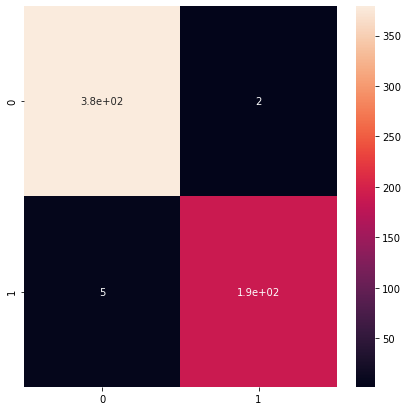

In [54]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(original, predict)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)

MINI CHALLENGE #6: 
- Print out the classification report and comment on the precision, recall and F1-score results

In [55]:
from sklearn.metrics import classification_report

report = classification_report(original, predict, labels = [0,1])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       381
           1       0.99      0.97      0.98       195

   micro avg       0.99      0.99      0.99       576
   macro avg       0.99      0.98      0.99       576
weighted avg       0.99      0.99      0.99       576



E:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:576: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [56]:
# Get the dataframe containing MRIs which have masks associated with them.
brain_df_mask = brain_df[brain_df['mask'] == 1]
brain_df_mask.shape

(1373, 4)

In [57]:
brain_df_mask

patient_id  \
445   TCGA_DU_5872_19950223   
507   TCGA_DU_5874_19950510   
551   TCGA_DU_5854_19951104   
555   TCGA_DU_5854_19951104   
617   TCGA_DU_5853_19950823   
...                     ...   
3785  TCGA_HT_7684_19950816   
3795  TCGA_HT_7684_19950816   
3797  TCGA_HT_7684_19950816   
3806  TCGA_HT_7684_19950816   
3808  TCGA_HT_7684_19950816   

                                             image_path  \
445   TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5.tif   
507   TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_5.tif   
551   TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_6.tif   
555   TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_6.tif   
617   TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_6.tif   
...                                                 ...   
3785  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_56...   
3795  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_57...   
3797  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_57...   
3806  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_58...   
3808  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_58...   

                                              mask_path  mask  
445   TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_5_...     1  
507   TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_5_...     1  
551   TCGA_CS_4944_20010208/TCGA_CS_4944_20010208_6_...     1  
555   TCGA_CS_5393_19990606/TCGA_CS_5393_19990606_6_...     1  
617   TCGA_HT_7680_19970202/TCGA_HT_7680_19970202_6_...     1  
...                                                 ...   ...  
3785  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_56...     1  
3795  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_57...     1  
3797  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_57...     1  
3806  TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_58...     1  
3808  TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_58...     1  

[1373 rows x 4 columns]

In [58]:
# split the data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(brain_df_mask, test_size=0.15)
X_test, X_val = train_test_split(X_val, test_size=0.5)

In [59]:
# create separate list for imageId, classId to pass into the generator

train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids = list(X_val.image_path)
val_mask= list(X_val.mask_path)

In [60]:
# Utilities file contains the code for custom loss function and custom data generator
from utilities import DataGenerator

# create image generators

training_generator = DataGenerator(train_ids,train_mask)
validation_generator = DataGenerator(val_ids,val_mask)

In [62]:
def resblock(X, f):
  

  # make a copy of input
  X_copy = X

  # main path
  # Read more about he_normal: https://medium.com/@prateekvishnu/xavier-and-he-normal-he-et-al-initialization-8e3d7a087528

  X = Conv2D(f, kernel_size = (1,1) ,strides = (1,1),kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)
  X = Activation('relu')(X) 

  X = Conv2D(f, kernel_size = (3,3), strides =(1,1), padding = 'same', kernel_initializer ='he_normal')(X)
  X = BatchNormalization()(X)

  # Short path
  # Read more here: https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

  X_copy = Conv2D(f, kernel_size = (1,1), strides =(1,1), kernel_initializer ='he_normal')(X_copy)
  X_copy = BatchNormalization()(X_copy)

  # Adding the output from main path and short path together

  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [63]:
# function to upscale and concatenate the values passsed
def upsample_concat(x, skip):
  x = UpSampling2D((2,2))(x)
  merge = Concatenate()([x, skip])

  return merge

In [64]:
input_shape = (256,256,3)

# Input tensor shape
X_input = Input(input_shape)

# Stage 1
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(X_input)
conv1_in = BatchNormalization()(conv1_in)
conv1_in = Conv2D(16,3,activation= 'relu', padding = 'same', kernel_initializer ='he_normal')(conv1_in)
conv1_in = BatchNormalization()(conv1_in)
pool_1 = MaxPool2D(pool_size = (2,2))(conv1_in)

# Stage 2
conv2_in = resblock(pool_1, 32)
pool_2 = MaxPool2D(pool_size = (2,2))(conv2_in)

# Stage 3
conv3_in = resblock(pool_2, 64)
pool_3 = MaxPool2D(pool_size = (2,2))(conv3_in)

# Stage 4
conv4_in = resblock(pool_3, 128)
pool_4 = MaxPool2D(pool_size = (2,2))(conv4_in)

# Stage 5 (Bottle Neck)
conv5_in = resblock(pool_4, 256)

# Upscale stage 1
up_1 = upsample_concat(conv5_in, conv4_in)
up_1 = resblock(up_1, 128)

# Upscale stage 2
up_2 = upsample_concat(up_1, conv3_in)
up_2 = resblock(up_2, 64)

# Upscale stage 3
up_3 = upsample_concat(up_2, conv2_in)
up_3 = resblock(up_3, 32)

# Upscale stage 4
up_4 = upsample_concat(up_3, conv1_in)
up_4 = resblock(up_4, 16)

# Final Output
output = Conv2D(1, (1,1), padding = "same", activation = "sigmoid")(up_4)

model_seg = Model(inputs = X_input, outputs = output )


In [65]:
model_seg.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        batch_normalization[0][0]        
____________________________________________________________________________________________

In [66]:
# Utilities file contains the code for custom loss function and custom data generator

from utilities import focal_tversky, tversky_loss, tversky

In [67]:
# Compile the model
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

In [68]:
# use early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="ResUNet-weights.hdf5", verbose=1, save_best_only=True)

In [69]:
# save the model architecture to json file for future use

model_json = model_seg.to_json()
with open("ResUNet-model.json","w") as json_file:
  json_file.write(model_json)

In [70]:
from utilities import focal_tversky, tversky_loss, tversky

with open('ResUNet-MRI.json', 'r') as json_file:
    json_savedModel= json_file.read()

# load the model architecture 
model_seg = tf.keras.models.model_from_json(json_savedModel)
model_seg.load_weights('weights_seg.hdf5')
adam = tf.keras.optimizers.Adam(lr = 0.05, epsilon = 0.1)
model_seg.compile(optimizer = adam, loss = focal_tversky, metrics = [tversky])

In [71]:
# Utilities file contains the code for custom loss function and custom data generator
from utilities import prediction

# making prediction
image_id, mask, has_mask = prediction(test, model, model_seg)

In [72]:
# creating a dataframe for the result
df_pred = pd.DataFrame({'image_path': image_id,'predicted_mask': mask,'has_mask': has_mask})
df_pred

image_path  \
0    TCGA_FG_A4MT_20020212/TCGA_FG_A4MT_20020212_43...   
1    TCGA_DU_8166_19970322/TCGA_DU_8166_19970322_33...   
2    TCGA_DU_7300_19910814/TCGA_DU_7300_19910814_25...   
3    TCGA_DU_A5TP_19970614/TCGA_DU_A5TP_19970614_2.tif   
4    TCGA_HT_7475_19970918/TCGA_HT_7475_19970918_29...   
..                                                 ...   
585  TCGA_DU_7019_19940908/TCGA_DU_7019_19940908_12...   
586  TCGA_DU_7013_19860523/TCGA_DU_7013_19860523_12...   
587  TCGA_HT_8113_19930809/TCGA_HT_8113_19930809_4.tif   
588  TCGA_HT_8114_19981030/TCGA_HT_8114_19981030_18...   
589  TCGA_DU_6404_19850629/TCGA_DU_6404_19850629_50...   

                                        predicted_mask  has_mask  
0                                              No mask         0  
1                                              No mask         0  
2                                              No mask         0  
3                                              No mask         0  
4    [[[[3.8551846e-07], [1.2910647e-06], [2.801422...         1  
..                                                 ...       ...  
585  [[[[7.6787677e-07], [2.5570835e-06], [4.691625...         1  
586                                            No mask         0  
587                                            No mask         0  
588  [[[[5.716927e-07], [1.959539e-06], [3.842091e-...         1  
589                                            No mask         0  

[590 rows x 3 columns]

In [74]:
# Merge the dataframe containing predicted results with the original test data.
df_pred = test.merge(df_pred, on = 'image_path')
df_pred.head()

image_path  \
0  TCGA_FG_A4MT_20020212/TCGA_FG_A4MT_20020212_43...   
1  TCGA_DU_8166_19970322/TCGA_DU_8166_19970322_33...   
2  TCGA_DU_7300_19910814/TCGA_DU_7300_19910814_25...   
3  TCGA_DU_A5TP_19970614/TCGA_DU_A5TP_19970614_2.tif   
4  TCGA_HT_7475_19970918/TCGA_HT_7475_19970918_29...   

                                           mask_path mask  \
0  TCGA_FG_A4MT_20020212/TCGA_FG_A4MT_20020212_43...    0   
1  TCGA_DU_8166_19970322/TCGA_DU_8166_19970322_33...    0   
2  TCGA_DU_7300_19910814/TCGA_DU_7300_19910814_25...    0   
3  TCGA_DU_A5TP_19970614/TCGA_DU_A5TP_19970614_2_...    0   
4  TCGA_HT_7475_19970918/TCGA_HT_7475_19970918_29...    1   

                                      predicted_mask  has_mask  
0                                            No mask         0  
1                                            No mask         0  
2                                            No mask         0  
3                                            No mask         0  
4  [[[[3.8551846e-07], [1.2910647e-06], [2.801422...         1